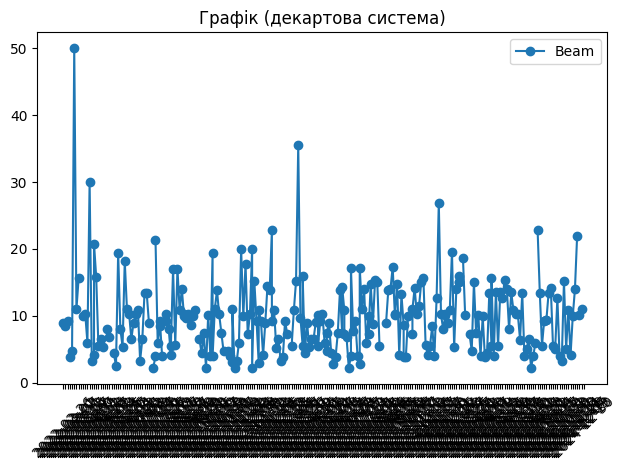

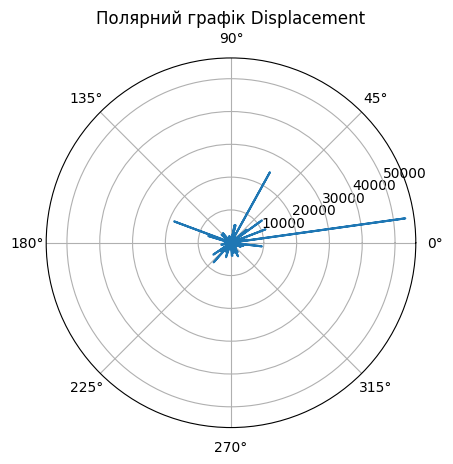

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Читаємо CSV
df = pd.read_csv("/Users/zelma4/Documents/11and12labs/sea_fleet_v4.csv", comment='/')

# Прибираємо цілісно порожні стовпці
df.dropna(axis=1, how='all', inplace=True)

# Створимо декартовий графік для двох стовпців
plt.figure()
plt.plot(df["Destruction Date"], df["Beam (m)"], marker='o', label="Beam")
plt.xticks(rotation=45)
plt.title("Графік (декартова система)")
plt.legend()
plt.tight_layout()
plt.show()

# Полярний графік (наприклад, змінимо індекс на діапазон 0..2π)
values = df["Displacement Full load (tons)"].fillna(0).values
theta = np.linspace(0, 2*np.pi, len(values))
plt.figure()
ax = plt.subplot(111, polar=True)
ax.plot(theta, values)
ax.set_title("Полярний графік Displacement")
plt.show()

In [5]:
import pandas as pd

df.dropna(axis=1, how='all', inplace=True)

stats = df.describe()
print(stats)

       Displacement Full load (tons)    Beam (m)  Speed (knots)  \
count                     234.000000  251.000000     221.000000   
mean                     1571.304145    9.743904      18.485475   
std                      4300.029517    5.765932      10.915146   
min                         3.200000    2.250000       3.300000   
25%                        99.700000    5.500000      11.700000   
50%                       493.000000    9.300000      14.000000   
75%                      1458.000000   13.300000      22.500000   
max                     53645.000000   50.000000      52.700000   

       Autonomy (days)  Complement  
count       191.000000  151.000000  
mean         14.729843   28.854305  
std          14.692307   44.243779  
min           0.200000    1.000000  
25%           5.000000    6.000000  
50%          10.000000   13.000000  
75%          20.000000   33.000000  
max          90.000000  220.000000  


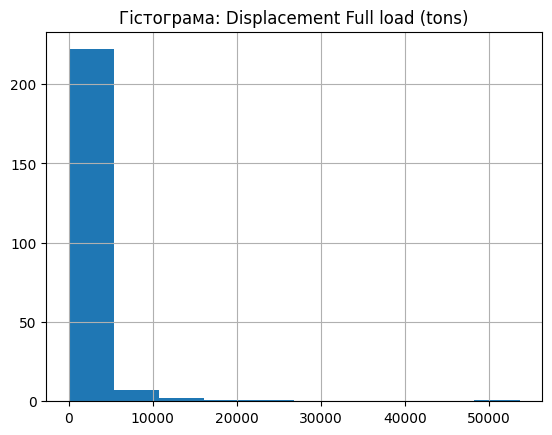

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df.dropna(axis=1, how='all', inplace=True)

col_name = "Displacement Full load (tons)"  # Приклад стовпця
plt.figure()
df[col_name].dropna().hist(bins=10)
plt.title(f"Гістограма: {col_name}")
plt.show()

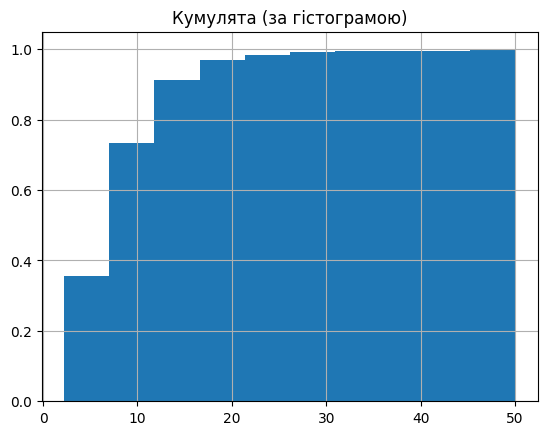

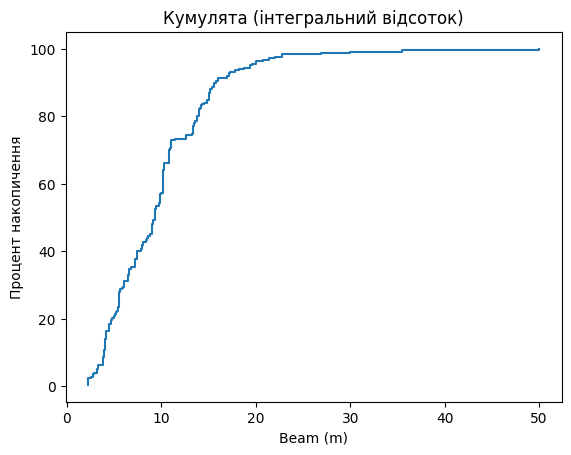

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df.dropna(axis=1, how='all', inplace=True)

col_name = "Beam (m)"
values = df[col_name].dropna()

# (a) За даними гістограми
plt.figure()
values.hist(cumulative=True, density=True, bins=10)
plt.title("Кумулята (за гістограмою)")
plt.show()

# (b) За інтегральним відсотком
sorted_vals = sorted(values)
cum_perc = [(i+1)/len(sorted_vals)*100 for i in range(len(sorted_vals))]
plt.figure()
plt.plot(sorted_vals, cum_perc, drawstyle='steps-post')
plt.title("Кумулята (інтегральний відсоток)")
plt.xlabel(col_name)
plt.ylabel("Процент накопичення")
plt.show()

In [8]:
# Приклад: формування простого звіту з використанням PDF або Excel може виконуватись
# засобами Python (pandas.to_excel / pydf і т.д.). Тут – мінімальний приклад виводу.

import pandas as pd

df.dropna(axis=1, how='all', inplace=True)

report = df.describe()
print("******** Звіт ********")
print(report)
print("Графіки та діаграми були згенеровані вище.")

******** Звіт ********
       Displacement Full load (tons)    Beam (m)  Speed (knots)  \
count                     234.000000  251.000000     221.000000   
mean                     1571.304145    9.743904      18.485475   
std                      4300.029517    5.765932      10.915146   
min                         3.200000    2.250000       3.300000   
25%                        99.700000    5.500000      11.700000   
50%                       493.000000    9.300000      14.000000   
75%                      1458.000000   13.300000      22.500000   
max                     53645.000000   50.000000      52.700000   

       Autonomy (days)  Complement  
count       191.000000  151.000000  
mean         14.729843   28.854305  
std          14.692307   44.243779  
min           0.200000    1.000000  
25%           5.000000    6.000000  
50%          10.000000   13.000000  
75%          20.000000   33.000000  
max          90.000000  220.000000  
Графіки та діаграми були згенеровані вищ

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

df.dropna(axis=1, how='all', inplace=True)

# Вибираємо один стовпець
col_data = df["Speed (knots)"].dropna().values

def count_turning_points(series):
    count = 0
    for i in range(1, len(series)-1):
        if (series[i] > series[i-1] and series[i] > series[i+1]) or (series[i] < series[i-1] and series[i] < series[i+1]):
            count += 1
    return count

for w in [9, 11, 13, 15]:
    smoothed = pd.Series(col_data).rolling(window=w, center=True, min_periods=1).mean()
    smoothed_values = smoothed.fillna(method="bfill").fillna(method="ffill")
    corr_val, _ = pearsonr(col_data, smoothed_values)
    turning_points = count_turning_points(smoothed_values)
    print(f"w={w}, Кореляція={corr_val:.4f}, Поворотні точки={turning_points}")

w=9, Кореляція=0.2175, Поворотні точки=104
w=11, Кореляція=0.2281, Поворотні точки=101
w=13, Кореляція=0.2297, Поворотні точки=101
w=15, Кореляція=0.3022, Поворотні точки=113


/var/folders/jx/smgj6fv53xz2plq96hksx46m0000gn/T/ipykernel_12514/1910632990.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  smoothed_values = smoothed.fillna(method="bfill").fillna(method="ffill")


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

df.dropna(axis=1, how='all', inplace=True)

col_data = df["Speed (knots)"].dropna().values

def count_turning_points(series):
    count = 0
    for i in range(1, len(series)-1):
        if (series[i] > series[i-1] and series[i] > series[i+1]) or (series[i] < series[i-1] and series[i] < series[i+1]):
            count += 1
    return count

smoothed_data = pd.Series(col_data)
windows = [3, 5, 9, 11, 13, 15]
for w in windows:
    smoothed_data = smoothed_data.rolling(window=w, center=True, min_periods=1).mean().fillna(method="bfill").fillna(method="ffill")
    corr_val, _ = pearsonr(col_data, smoothed_data)
    turning_points = count_turning_points(smoothed_data)
    print(f"w={w}, Кореляція={corr_val:.4f}, Поворотні точки={turning_points}")

w=3, Кореляція=0.5419, Поворотні точки=104
w=5, Кореляція=0.4905, Поворотні точки=74
w=9, Кореляція=0.3268, Поворотні точки=24
w=11, Кореляція=0.3189, Поворотні точки=18
w=13, Кореляція=0.2720, Поворотні точки=16
w=15, Кореляція=0.2438, Поворотні точки=11


/var/folders/jx/smgj6fv53xz2plq96hksx46m0000gn/T/ipykernel_12514/4269276579.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  smoothed_data = smoothed_data.rolling(window=w, center=True, min_periods=1).mean().fillna(method="bfill").fillna(method="ffill")


In [11]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

df.dropna(axis=1, how='all', inplace=True)

data = df["Speed (knots)"].dropna().values

def pollard_smoothing(series, w):
    # Приклад: центр має вищу вагу, можна підлаштувати
    weights = np.ones(w)
    mid = w // 2
    weights[mid] = 2.0
    weights /= weights.sum()
    result = []
    half = w // 2
    for i in range(len(series)):
        left = max(0, i - half)
        right = min(len(series), i + half + 1)
        window_vals = series[left:right]
        w_slice = weights[half - (i - left): half + (right - i)]
        result.append(np.sum(window_vals * w_slice))
    return np.array(result)

def count_turning_points(series):
    count = 0
    for i in range(1, len(series)-1):
        if (series[i] > series[i-1] and series[i] > series[i+1]) or (series[i] < series[i-1] and series[i] < series[i+1]):
            count += 1
    return count

# Аналогічно, як у Кендела: для w=9,11,13,15 і багатоступенево
for w in [9, 11, 13, 15]:
    smoothed = pollard_smoothing(data, w)
    corr_val = pearsonr(data, smoothed)[0]
    t_points = count_turning_points(smoothed)
    print(f"Pollard w={w}, Кореляція={corr_val:.4f}, Поворотні точки={t_points}")

Pollard w=9, Кореляція=0.5020, Поворотні точки=123
Pollard w=11, Кореляція=0.4777, Поворотні точки=134
Pollard w=13, Кореляція=0.4550, Поворотні точки=126
Pollard w=15, Кореляція=0.4874, Поворотні точки=126


In [12]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

df.dropna(axis=1, how='all', inplace=True)

data = df["Speed (knots)"].dropna().values

def exp_smoothing(series, alpha):
    result = [series[0]]
    for i in range(1, len(series)):
        result.append(alpha * series[i] + (1 - alpha) * result[-1])
    return np.array(result)

def count_turning_points(series):
    count = 0
    for i in range(1, len(series)-1):
        if (series[i] > series[i-1] and series[i] > series[i+1]) or (series[i] < series[i-1] and series[i] < series[i+1]):
            count += 1
    return count

for alpha in [0.1, 0.15, 0.2, 0.25, 0.3]:
    smoothed = exp_smoothing(data, alpha)
    corr_val = pearsonr(data, smoothed)[0]
    t_points = count_turning_points(smoothed)
    print(f"alpha={alpha}, Кореляція={corr_val:.4f}, Поворотні точки={t_points}")

alpha=0.1, Кореляція=0.4051, Поворотні точки=102
alpha=0.15, Кореляція=0.5177, Поворотні точки=110
alpha=0.2, Кореляція=0.5981, Поворотні точки=112
alpha=0.25, Кореляція=0.6619, Поворотні точки=112
alpha=0.3, Кореляція=0.7153, Поворотні точки=114


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

df.dropna(axis=1, how='all', inplace=True)

data = df["Speed (knots)"].dropna().values

def median_smoothing(series, w):
    result = []
    half = w // 2
    for i in range(len(series)):
        left = max(0, i - half)
        right = min(len(series), i + half + 1)
        window_vals = series[left:right]
        result.append(np.median(window_vals))
    return np.array(result)

def count_turning_points(series):
    count = 0
    for i in range(1, len(series)-1):
        if (series[i] > series[i-1] and series[i] > series[i+1]) or (series[i] < series[i-1] and series[i] < series[i+1]):
            count += 1
    return count

for w in [9, 11, 13, 15]:
    med_smooth = median_smoothing(data, w)
    corr_val = pearsonr(data, med_smooth)[0]
    t_points = count_turning_points(med_smooth)
    print(f"Median w={w}, Кореляція={corr_val:.4f}, Поворотні точки={t_points}")

Median w=9, Кореляція=0.1753, Поворотні точки=33
Median w=11, Кореляція=0.1037, Поворотні точки=21
Median w=13, Кореляція=0.1585, Поворотні точки=27
Median w=15, Кореляція=0.2098, Поворотні точки=26


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Приклад: Будуємо зведені криві для різних згладжувань
# (Тут можна об’єднати рішення з попередніх клітинок)

print("Графіки згладжувань: виводьте при потребі, комбіновано.")

Графіки згладжувань: виводьте при потребі, комбіновано.


In [15]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

df.dropna(axis=1, how='all', inplace=True)

# 2. Коефіцієнт кореляції
data1 = df["Speed (knots)"].dropna()
data2 = df["Beam (m)"].dropna()

# Зрівняємо довжини (мінімальна)
min_len = min(len(data1), len(data2))
corr_val, _ = pearsonr(data1[:min_len], data2[:min_len])
print("Коефіцієнт кореляції:", corr_val)

# 3. Кореляційне відношення (спрощено)
# Приклад швидкого розрахунку
def correlation_ratio(categories, measurements):
    fcat, ucat = pd.factorize(categories)
    cat_avg = {}
    for c in range(len(ucat)):
        cat_vals = measurements[fcat == c]
        cat_avg[c] = cat_vals.mean()
    overall_mean = measurements.mean()
    ss_b = sum([len(measurements[fcat == c])*(m - overall_mean)**2 for c,m in cat_avg.items()])
    ss_w = sum([(val - cat_avg[f])**2 for f,val in zip(fcat, measurements)])
    return ss_b/(ss_b+ss_w)

# 4. Графіки автокореляцій
# Приклад автокореляції
def autocorrelation(x, lag=1):
    return np.corrcoef(x[:-lag], x[lag:])[0,1]

max_lag = 5
for L in range(1, max_lag+1):
    ac = autocorrelation(data1.values, lag=L)
    print(f"Лаг {L} автокореляція={ac}")

# 5. Розбити на 3 рівні частини
split_data = np.array_split(data1.values, 3)

# 6. Кореляційна матриця
arr_parts = [pd.Series(s) for s in split_data]
matrix = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        mi_len = min(len(arr_parts[i]), len(arr_parts[j]))
        matrix[i,j] = pearsonr(arr_parts[i][:mi_len], arr_parts[j][:mi_len])[0]
print("Кореляційна матриця трьох частин:")
print(matrix)

# 7. Коефіцієнти множинної кореляції – довільна ілюстрація
# (простий приклад між трьома стовпцями)
dt = df[["Speed (knots)", "Beam (m)", "Complement"]].dropna()
corr_matrix = dt.corr()
print("Множинна кореляція (матриця):")
print(corr_matrix)

# 8. Автокореляція - вже зробили вище на прикладі.

Коефіцієнт кореляції: 0.03426905470808035
Лаг 1 автокореляція=-0.04488084332828643
Лаг 2 автокореляція=0.009432480147699408
Лаг 3 автокореляція=-0.03735898544346208
Лаг 4 автокореляція=-0.14268367792504075
Лаг 5 автокореляція=0.044394131407533864
Кореляційна матриця трьох частин:
[[ 1.          0.16572005 -0.18938643]
 [ 0.16572005  1.         -0.12952329]
 [-0.18938643 -0.12952329  1.        ]]
Множинна кореляція (матриця):
               Speed (knots)  Beam (m)  Complement
Speed (knots)       1.000000 -0.135410    0.217199
Beam (m)           -0.135410  1.000000    0.554792
Complement          0.217199  0.554792    1.000000


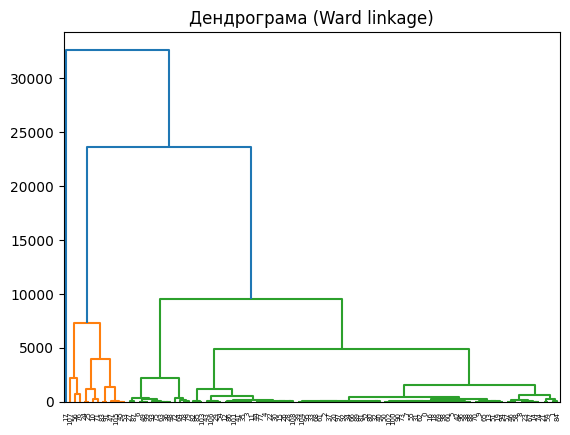

Результати кластеризації (мітки кластерів):
[42 61 35 26 28 46 13 40 57 49  5 26 25 51 58 30 42 63 43 52 36 60 28 57
  4  4 30 10 31 22 30 45 38 33 36 26 14 35 47 34 39 26 46 24 29  8 54  9
 14 12 41 51 37  8 22 40  1 56 55 60 46 35 42 14 18 49 36 59 33 44 50  6
 19 40 58 14  2 28 16 17 37 37 21  7 62 20 25 11 47 37 40  7 36 15 53 33
 48 36 46 12 40 27 40 20 33  8 23  3 32]


In [16]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

df.dropna(axis=1, how='all', inplace=True)

# 2. Таблиця «об’єкт-властивість» – вибір числових стовпців
data_num = df.select_dtypes(include=[np.number]).dropna()
# 3. «Таблиця-оригінал» та «таблиця-копія»
data_copy = data_num.copy()

# 4. Формула розрахунку близькості: використовуємо 'euclidean'
# 5. Побудова матриці близькості – робиться всередині linkage
Z = linkage(data_num, method='ward', metric='euclidean')

# 7. Стратегія об’єднання – агломеративна (Ward)
# 8. Кластерний аналіз
clusters = fcluster(Z, t=5, criterion='distance')

# 9. Таблиця «об’єднання – вузол – метрика» – є в Z
# 10. Дендрограма
plt.figure()
dendrogram(Z)
plt.title("Дендрограма (Ward linkage)")
plt.show()

# 11. Інтерпретація - зазвичай аналіз cluster labels
print("Результати кластеризації (мітки кластерів):")
print(clusters)